In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
!gdown --id 1x2rAhO5mrRE697vy7J9IK1eSCvmJtfNi

Downloading...
From: https://drive.google.com/uc?id=1x2rAhO5mrRE697vy7J9IK1eSCvmJtfNi
To: /content/bird.jpg
100% 48.9k/48.9k [00:00<00:00, 18.2MB/s]


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bird.jpg to bird (1).jpg


In [ ]:
img = cv2.imread('bird.jpg')
print(img.shape)

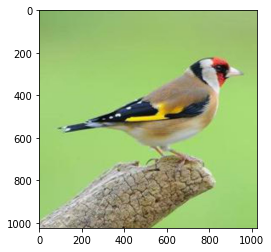

In [ ]:
show_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(show_img)
plt.show()

In [ ]:
update_count = 0
K = 2
K_means = np.random.randint(low=0,high=256,size=(K,3)).astype('float')
labels = np.zeros((img.shape[0],img.shape[1]), dtype=np.int)
labels_update = np.ones((img.shape[0],img.shape[1]), dtype=np.int)
img = np.float32(img)
labels_change = 100.0
K_distance = np.empty(K)
print(K_means)

[[132.  14.  83.]
 [214. 147. 124.]]


In [ ]:
while labels_change >= 1.0:
  print('update %d'%(update_count))
  labels_count = 0
  center = np.zeros((K,3))
  count = np.zeros(K)

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      for K_num in range(K):
        K_distance[K_num] = np.sqrt(np.square(img[i][j][0] - K_means[K_num][0]) + 
                        np.square(img[i][j][1] - K_means[K_num][1]) + 
                        np.square(img[i][j][2] - K_means[K_num][2]))
      
      labels_update[i][j] = np.argmin(K_distance)
      count[labels_update[i][j]] += 1
      center[labels_update[i][j]][0] += img[i][j][0]
      center[labels_update[i][j]][1] += img[i][j][1]
      center[labels_update[i][j]][2] += img[i][j][2]
      if update_count >=1 :
        if labels_update[i][j] != labels[i][j]:
            labels_count += 1

  if update_count >=1 :
      labels_change = np.round(labels_count / (img.shape[0] * img.shape[1]),1) * 100
  #update center
  if labels_change >= 1.0:
    for i in range(K):
      if count[i] != 0:
        K_means[i][0] = center[i][0] / count[i]
        K_means[i][1] = center[i][1] / count[i]
        K_means[i][2] = center[i][2] / count[i]
      labels = labels_update
  update_count += 1


update 0
update 1


In [ ]:
# K_means = np.round(K_means)
K_means = np.uint8(K_means)
print(K_means)

[[ 60  83  94]
 [119 194 162]]


In [ ]:
x = cv2.imread('bird.jpg')
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    x[i][j][:] = K_means[labels_update[i][j]]

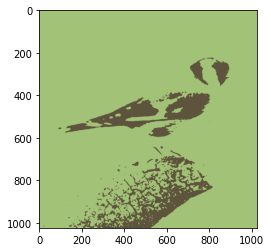

In [ ]:
show_img = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(show_img)
plt.show()

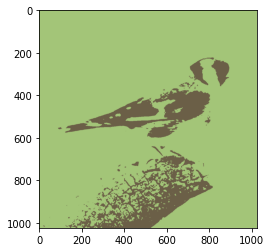

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('bird.jpg')
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
show_img = cv2.cvtColor(res2,cv2.COLOR_BGR2RGB)
plt.imshow(show_img)
plt.show()